# ¡Calculemos $\pi$ de muchas maneras!

¡Hoy es el día de $\pi$! La fecha de hoy es el 14 de marzo del 2017, o sea 3-14, los cuales son los primeros dígitos de $\pi$, y por lo tanto se ha designado como [el día de $\pi$](https://en.wikipedia.org/wiki/Pi_Day).

En honor a este evento importante, veremos unos métodos para calcular $\pi$ usando distintas técnicas numéricas. Algunas serán aplicaciones de técnicas que ya vimos, mientras que otras serán un avance de técnicas por verse más adelante en el curso.

En cada caso, las metas son las siguientes, como en casi cualquier problema de cómputo científico:

- Entender el problema matemático y su relación con $\pi$ (es decir, cómo ocurre $\pi$ como solución al problema matemático).
- Desarrollar e implementar un método numérico correspondiente.
- Entender cuáles son las propiedades de convergencia del método e intentar sacar el mayor precisión (número de dígitos de $\pi$) posible.

## $\pi$ como una raíz

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

**[1]** ¿Para cuál función trigonométrica es $\pi$ una raíz? Usa esto para calcular $\pi$ con el mayor número de dígitos posible. (¿Cuál método numérico podríamos utilizar para calcular la función trigonométrica si lo tuviéramos que hacer nosotros? Hazlo si tienes ganas.)

In [2]:
function Newton(f::Function, fp, x0::Number, n)
    xx = Number[x0]
    yy = Number[]
    for i in 1:n
        y = f(xx[i])
        dy = fp(xx[i])
        xn = xx[i] - y/dy
        push!(yy, xn)
        push!(xx, xn)
        #@show i, y, dy, v
    end
    pop!(xx)
    return xx, yy
end

Newton (generic function with 1 method)

In [3]:
h(x)=sin(x)
hp(x)=cos(x)

hp (generic function with 1 method)

In [4]:
a, b = Newton(h, hp, 2, 100)

(Number[2,4.18504,2.46789,3.26619,3.14094,3.14159,3.14159,3.14159,3.14159,3.14159  …  3.14159,3.14159,3.14159,3.14159,3.14159,3.14159,3.14159,3.14159,3.14159,3.14159],Number[4.18504,2.46789,3.26619,3.14094,3.14159,3.14159,3.14159,3.14159,3.14159,3.14159  …  3.14159,3.14159,3.14159,3.14159,3.14159,3.14159,3.14159,3.14159,3.14159,3.14159])

In [5]:
a[end]

3.141592653589793

### Matrices

In [6]:
[i+j for i in 1:6, j in 1:6]

6×6 Array{Int64,2}:
 2  3  4   5   6   7
 3  4  5   6   7   8
 4  5  6   7   8   9
 5  6  7   8   9  10
 6  7  8   9  10  11
 7  8  9  10  11  12

In [7]:
f(x,y) = x + y
[f(i,j) for i in 1:6, j in 1:6]

6×6 Array{Int64,2}:
 2  3  4   5   6   7
 3  4  5   6   7   8
 4  5  6   7   8   9
 5  6  7   8   9  10
 6  7  8   9  10  11
 7  8  9  10  11  12

In [8]:
[f(i,j) for i in 10:16 for j in i:15 if (i+j)%2==0]

12-element Array{Int64,1}:
 20
 22
 24
 22
 24
 26
 24
 26
 26
 28
 28
 30

In [9]:
[(i,j) for i in 10:16, j in 1:6]

7×6 Array{Tuple{Int64,Int64},2}:
 (10,1)  (10,2)  (10,3)  (10,4)  (10,5)  (10,6)
 (11,1)  (11,2)  (11,3)  (11,4)  (11,5)  (11,6)
 (12,1)  (12,2)  (12,3)  (12,4)  (12,5)  (12,6)
 (13,1)  (13,2)  (13,3)  (13,4)  (13,5)  (13,6)
 (14,1)  (14,2)  (14,3)  (14,4)  (14,5)  (14,6)
 (15,1)  (15,2)  (15,3)  (15,4)  (15,5)  (15,6)
 (16,1)  (16,2)  (16,3)  (16,4)  (16,5)  (16,6)

## $\pi$ y el círculo

**[2]** (i) ¿Cuál es el área de un disco de radio $r$? Así, ¿cuál es el área de un disco de radio $1$?

El área de un disco está dado por:
        $$A = \pi r^2$$
Así que el área de un disco de radio 1 es $A = \pi$

In [10]:
área_disco(r) = π * r^2 

área_disco (generic function with 1 method)

In [11]:
área_disco(1)

3.141592653589793

(ii) ¿Cuál es la condición para que un punto $(x, y)$ caiga adentro de un disco de radio $r$?

(iii) Usemos el método de "pintar" como sigue. Considera una caja cuadrada que contenga el disco. Divídelo en cuadritos [pista: usar la función `linspace` para dividirlo en $L$ partes en la dirección $x$ y $L$ en la dirección $y$, por separado]. Para cada cuadrito, aproxima si el cae o no adentro del disco al checar si su punto céntrico lo hace. Dibuja el resultado, con un calor para las cajas que caigan adentro, y otro para los que caigan afuera.

In [12]:
function malla(L, r)
    v = zeros(r, r)
    x = collect(linspace(-L/2, L/2, r))
    #y = collect(linspace(-L/2, L/2, r))
    
    for i in 1:r
        for j in 1:r
            if x[i]^2 + x[j]^2 <= (L/2)^2
                v[i, j] = (L/r)^2
            end
        end
    end
    return v
end

malla (generic function with 1 method)

In [ ]:
function malla(L, r)
    v = zeros(r, r)
    x = collect(linspace(-L/2, L/2, r))
    #y = collect(linspace(-L/2, L/2, r))
    
    for i in 1:r
        for j in 1:r
            if x[i]^2 + x[j]^2 <= (L/2)^2
                v[i, j] = 1
            end
        end
    end
    return v
end

In [13]:
a = malla(1, 10)

10×10 Array{Float64,2}:
 0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0   0.01  0.01  0.01  0.01  0.01  0.01  0.0   0.0
 0.0  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.0
 0.0  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.0
 0.0  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.0
 0.0  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.0
 0.0  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.0
 0.0  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.0
 0.0  0.0   0.01  0.01  0.01  0.01  0.01  0.01  0.0   0.0
 0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0

In [14]:
sum(a)

0.6000000000000003


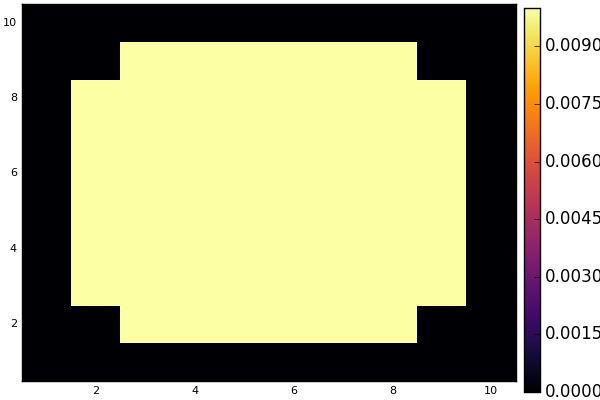

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [15]:
heatmap(a)

In [16]:
M = zeros(Number, 3, 3)

3×3 Array{Number,2}:
 0  0  0
 0  0  0
 0  0  0

(iv) Así, calcula el área aproximada del disco. ¿A qué operación matemática corresponde el cálculo de un área de esta forma? Utiliza el resultado para calcular $\pi$.

(v) Si cambias $N$, ¿cuánto trabajo tendrás que hacer? Estima (analíticamente) la **complejidad computacional**, es decir, el número (aproximado) de operaciones como función de $N$. ¿Cómo puedes estimar el error que cometerás para el área? 

(vi) Calcula numéricamente el error (desde el valor exacto de $\pi$) en función de $L$. ¿Cómo converge?

**[3]** (i) ¿Cuál es la circunferencia de un círculo de radio $r$?

(ii) Usa el método de "pintar" pero sólo pintando los cuadritos que están "en el círculo". [Pista: Puedes aproximar esto diciendo que el centro del cuadrito esté dentro de una cierta tolerancia de la frontera. ¿Cuál tolerancia sería razonable utilizar?]

(iii) Así, calcula el valor de $\pi$ en función de $L$, y encuentra la tasa de convergencia.

## $\pi$ como una integral

**[4]** (i) Pensando de nuevo en el disco de radio $r$, enfoquémonos en el cuadrante positivo ($x \ge 0$ y $y \ge 0$).
Escribe el área del cuadrante como una integral sobre $x$. [Pista: dada $x$, cuál es el valor de $y$ correspondiente sobre el círculo?

(ii) Divide el intervalo en $x$ en $L$ partes y utiliza una integral de Riemann para aproximar el área, y así calcular $\pi$. [Pista: ¿cuál es un valor del radio $r$ útil?]

(iii) ¿Cómo converge en función de $L$ el error? Dibújalo.

## Un método azaroso: tirar dardos

**[5]** Más adelante en el curso, veremos que los **métodos Monte Carlo**, o métodos azarosos, pueden ser útiles. Veremos un primer ejemplo aquí.

Pensemos de nuevo en el disco, digamos de radio $1$. 

(i) Tiremos dardos a un cuadrado que contenga el disco, digamos $[-1,1] \times [-1,1]$. Para hacerlo, utiliza la función `rand`, que genera números aleatorios distribuidos uniformemente entre $0$ y $1$. ¿Cómo puedes generar números uniformemente entre $-1$ y $1$?

(ii) Genera $N$ puntos al azar en el cuadrado. Dibuja los puntos que caigan adentro del disco en un color, y los que caigan afuera en otro color.

(iii) ¿Cuál será la relación entre las áreas y los números de puntos correspondientes? Así, estima el valor de $\pi$.

(iv) Para cada valor de $N$, repite el experimento varias veces y saca un promedio.

(v) Dibuja el error de este promedio desde el valor exacto de $\pi$, como función de $N$. ¿Cómo converge?

## Series para $\pi$

**[6]** En uno de los primeros notebooks, vimos una serie infinita para $\pi$, pero converge muy lento. Implementa algunos de estos algoritmos modernos y eficientes para calcular $\pi$ y encuentra numéricamente cómo convergen [utiliza `BigFloat` cuando sea necesario]: 

https://en.wikipedia.org/wiki/Approximations_of_%CF%80#Development_of_efficient_formulae